In [1]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import missingno 

In [2]:
#df = pd.read_excel('Glycohemoglobin_t1.xlsx')
#df = pd.read_excel('Glycohemoglobin_t3.xlsx')
#df = pd.read_excel('Glycohemoglobin_t4.xlsx')
df = pd.read_excel('Glycohemoglobin_t4_ShortName.xlsx')

<Axes: >

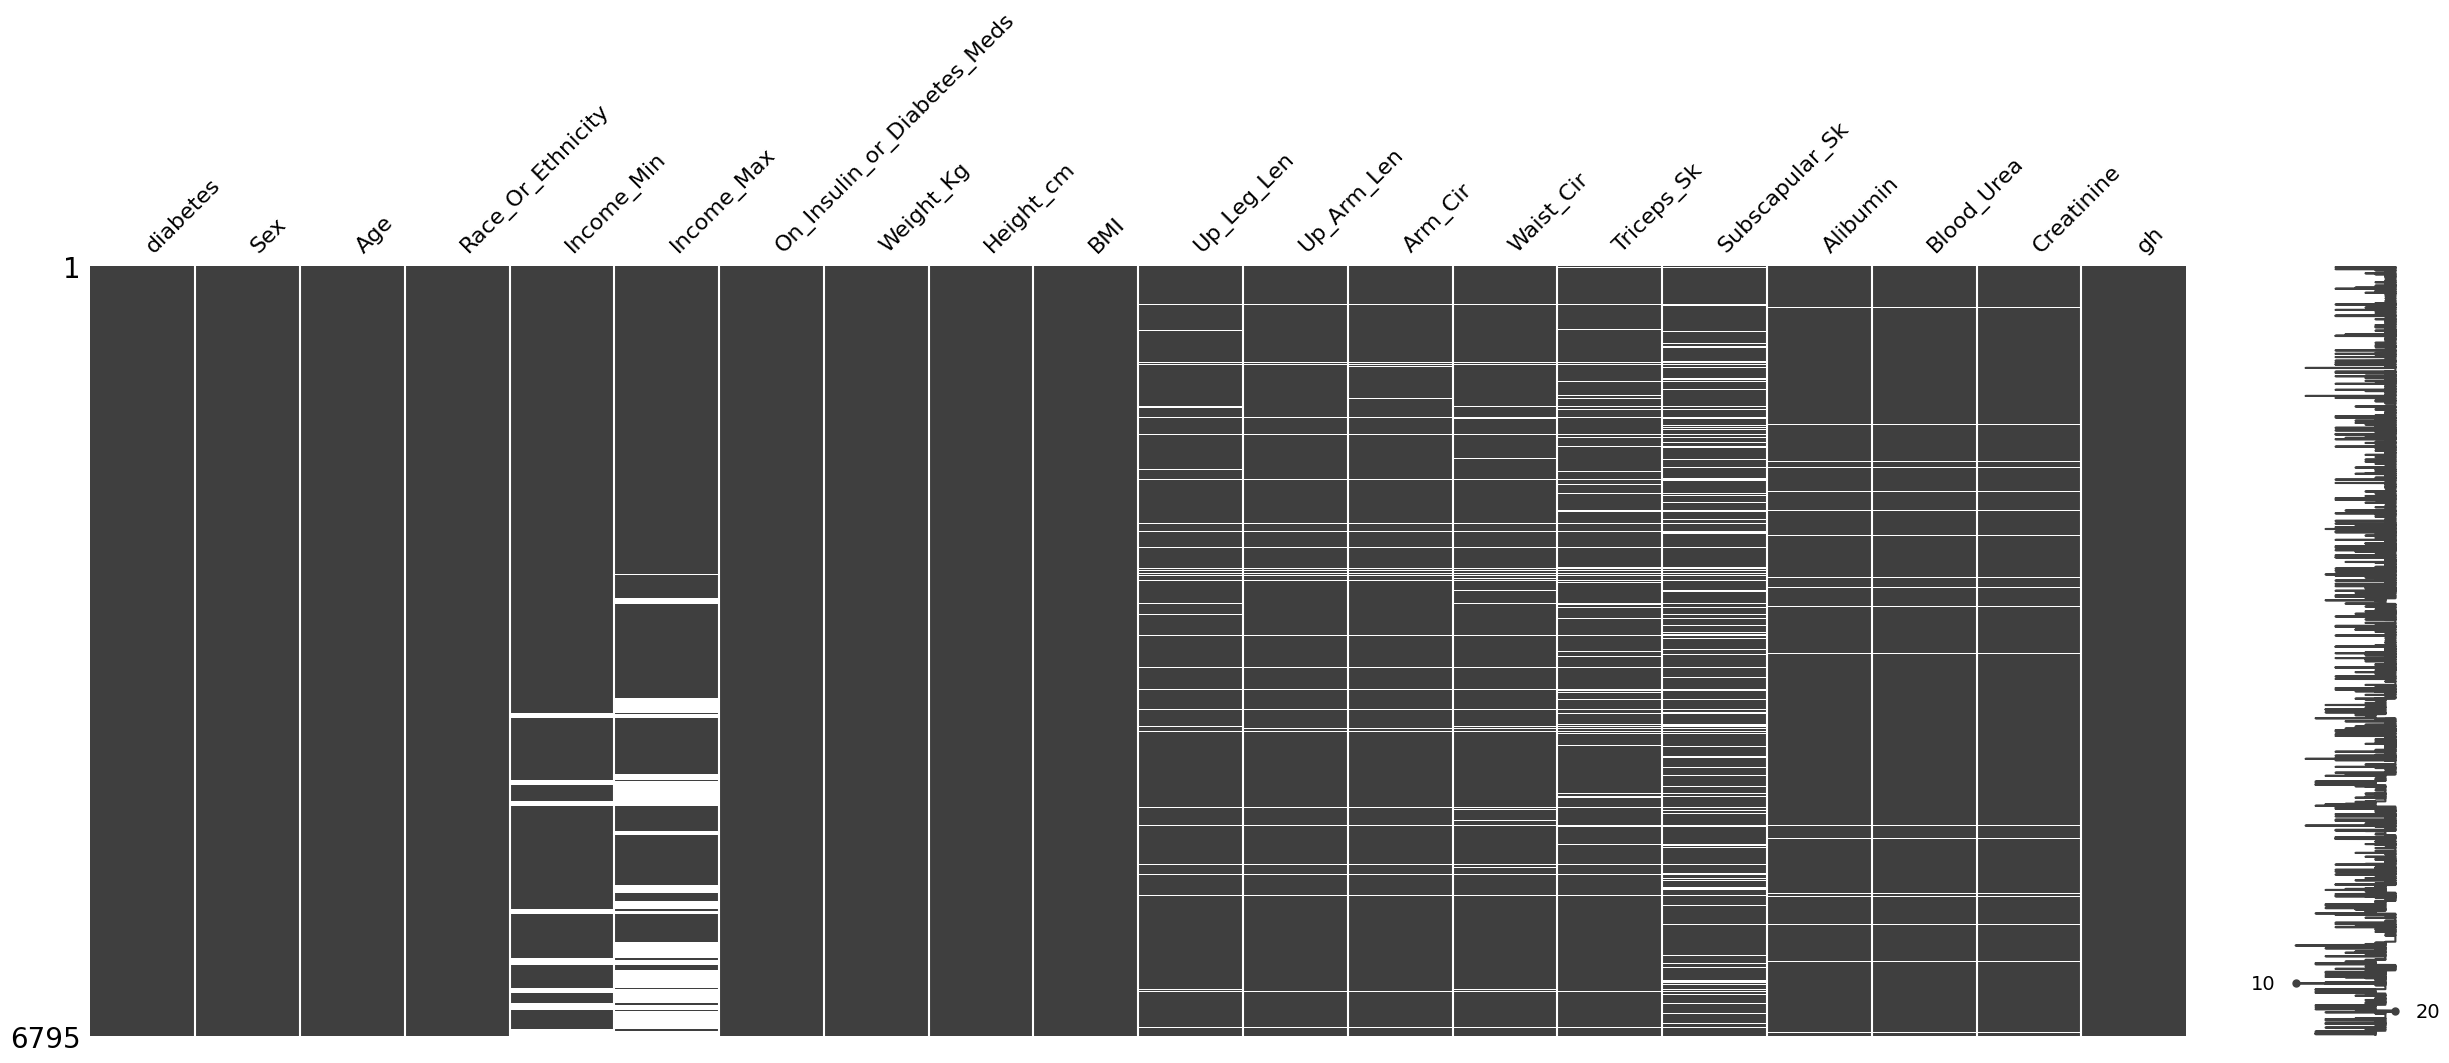

In [3]:
missingno.matrix(df, figsize = (30,10))

In [4]:
# To check data types, type: df.dtypes
df.dtypes

diabetes                         int64
Sex                              int64
Age                            float64
Race_Or_Ethnicity                int64
Income_Min                     float64
Income_Max                     float64
On_Insulin_or_Diabetes_Meds      int64
Weight_Kg                      float64
Height_cm                      float64
BMI                            float64
Up_Leg_Len                     float64
Up_Arm_Len                     float64
Arm_Cir                        float64
Waist_Cir                      float64
Triceps_Sk                     float64
Subscapular_Sk                 float64
Alibumin                       float64
Blood_Urea                     float64
Creatinine                     float64
gh                             float64
dtype: object

In [5]:
df.describe(include='all')

,diabetes,Sex,Age,Race_Or_Ethnicity,Income_Min,Income_Max,On_Insulin_or_Diabetes_Meds,Weight_Kg,Height_cm,BMI,Up_Leg_Len,Up_Arm_Len,Arm_Cir,Waist_Cir,Triceps_Sk,Subscapular_Sk,Alibumin,Blood_Urea,Creatinine,gh
count,6795.000000,6795.000000,6795.000000,6795.000000,6400.000000,5366.000000,6795.000000,6795.000000,6795.000000,6795.000000,6564.000000,6616.000000,6607.000000,6556.000000,6314.000000,5824.000000,6706.000000,6706.000000,6706.000000,6795.000000
mean,0.134511,0.496247,44.293304,2.637233,41262.500000,41764.815505,0.091832,79.370625,167.042958,28.321741,38.409324,36.874607,32.485152,96.254149,18.787726,19.961556,4.273621,12.917686,0.878627,5.676586
std,0.341225,0.500023,20.593529,1.088434,31013.885149,27238.504068,0.288810,21.930903,10.264984,6.950110,3.876902,2.781616,5.297660,17.059193,8.319393,8.369083,0.326545,5.717571,0.445238,0.964700
min,0.000000,0.000000,12.000000,1.000000,0.000000,5000.000000,0.000000,28.000000,123.300000,13.180000,20.400000,24.800000,16.800000,52.000000,2.600000,3.800000,2.500000,1.000000,0.140000,4.000000
25%,0.000000,0.000000,25.700000,2.000000,20000.000000,20000.000000,0.000000,64.000000,159.600000,23.430000,36.000000,35.000000,28.850000,83.500000,12.000000,13.000000,4.100000,9.000000,0.700000,5.200000
50%,0.000000,0.000000,43.800000,3.000000,35000.000000,35000.000000,0.000000,76.300000,166.600000,27.290000,38.400000,36.800000,32.100000,95.300000,17.900000,19.400000,4.300000,12.000000,0.830000,5.500000
75%,0.000000,1.000000,61.300000,3.000000,65000.000000,55000.000000,0.000000,91.100000,174.500000,31.880000,41.000000,38.800000,35.600000,106.900000,25.000000,26.200000,4.500000,15.000000,0.980000,5.800000
max,1.000000,1.000000,80.000000,5.000000,100000.000000,100000.000000,1.000000,239.400000,202.700000,84.870000,50.600000,47.000000,61.000000,179.000000,41.100000,40.400000,5.300000,90.000000,15.660000,16.400000


In [6]:
# Split data set into 75:25.

from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df, test_size=0.25, random_state=1938)

# If you want to confirm ratio splitted:
print( len(dftrain)/len(df) )
print( len(dftest)/len(df) )

0.749963208241354
0.25003679175864607


In [19]:
formula = (
    "BMI ~ Sex + Age + Race_Or_Ethnicity + Income_Min + Income_Max + On_Insulin_or_Diabetes_Meds + Weight_Kg + Height_cm + gh + Up_Leg_Len + Up_Arm_Len + Arm_Cir + Waist_Cir + Triceps_Sk + Subscapular_Sk + Alibumin + Blood_Urea + Creatinine + diabetes"
)
mlr_full = ols(formula, dftrain).fit()

print(mlr_full.summary())
print('\nMSE =', mlr_full.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:04:46   Log-Likelihood:                -3344.0
No. Observations:                3238   AIC:                             6728.
Df Residuals:                    3218   BIC:                             6850.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [18]:
formula = (
    "BMI ~ Sex + Age + Race_Or_Ethnicity + On_Insulin_or_Diabetes_Meds + Triceps_Sk + Subscapular_Sk + Alibumin + Creatinine + gh"
)
mlr_full = ols(formula, dftrain).fit()

print(mlr_full.summary())
print('\nMSE =', mlr_full.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     821.5
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:04:15   Log-Likelihood:                -11220.
No. Observations:                4245   AIC:                         2.246e+04
Df Residuals:                    4235   BIC:                         2.252e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         